<ipython-input-3-59608ef5e8a4>:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


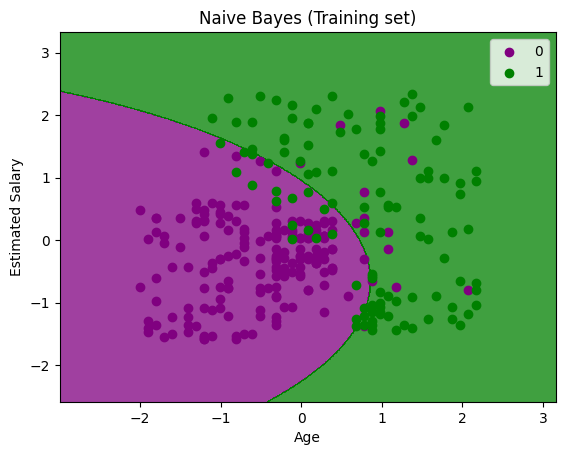

<ipython-input-3-59608ef5e8a4>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


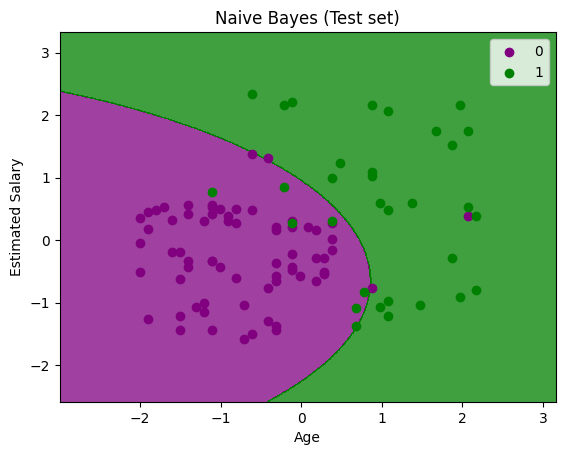

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('User_Data.csv')

x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
print(cm)

[[65  3]
 [ 7 25]]


In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, classifier.predict(x_train))
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8833333333333333
Test Accuracy: 0.9


In [ ]:
!pip install pgmpy
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [ ]:
names = ['age', 'chol', 'fbs', 'restecg', 'thalach', 'target']
heartDisease = pd.read_csv('heart.csv')
heartDisease = heartDisease.replace('?', np.nan)
model = BayesianModel([('age', 'fbs'),
                       ('fbs', 'target'),
                       ('target', 'restecg'),
                       ('target', 'thalach'),
                       ('target', 'chol')])
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)
HeartDisease_infer = VariableElimination(model)
q = HeartDisease_infer.query(variables=['target'], evidence={'age': 37})
print(q)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4496 |
+-----------+---------------+
| target(1) |        0.5504 |
+-----------+---------------+


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

model = BayesianNetwork([('Burglary', 'Alarm'),
                         ('Earthquake', 'Alarm'),
                         ('Alarm', 'JohnCalls'),
                         ('Alarm', 'MaryCalls')])

cpd_burglary = TabularCPD('Burglary', 2, [[0.999], [0.001]])
cpd_earthquake = TabularCPD('Earthquake', 2, [[0.998], [0.002]])
cpd_alarm = TabularCPD('Alarm', 2, [[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]], evidence=['Burglary', 'Earthquake'], evidence_card=[2, 2])
cpd_john_calls = TabularCPD('JohnCalls', 2, [[0.95, 0.1], [0.05, 0.9]], evidence=['Alarm'], evidence_card=[2])
cpd_mary_calls = TabularCPD('MaryCalls', 2, [[0.94, 0.16], [0.06, 0.84]], evidence=['Alarm'], evidence_card=[2])
model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_john_calls, cpd_mary_calls)
inference = VariableElimination(model)
posterior_alarm = inference.query(['Alarm'], evidence={'JohnCalls': 1, 'MaryCalls': 1})
print(f"P(Alarm=True | JohnCalls=True, MaryCalls=True) = {posterior_alarm.values[1]:.4f}")

P(Alarm=True | JohnCalls=True, MaryCalls=True) = 0.3887
